# Amazing RL Agent

In [65]:
import gymnasium as gym
import torch
import numpy as np
import importlib

# Render screen, set to false if training
RENDER_AGENT = True


In [66]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [81]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents
)
#agent = agents.Agent()

agent = agents.TD3(24, 4, 1, noise=0.25, copy_step=3)
scores = []
import matplotlib.pyplot as plt


In [ ]:
agent.noise = 0.0
# no noise post episode 2000

In [83]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

Episode: 0, Reward: 674.2952268562046, Memory Size: 128000


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

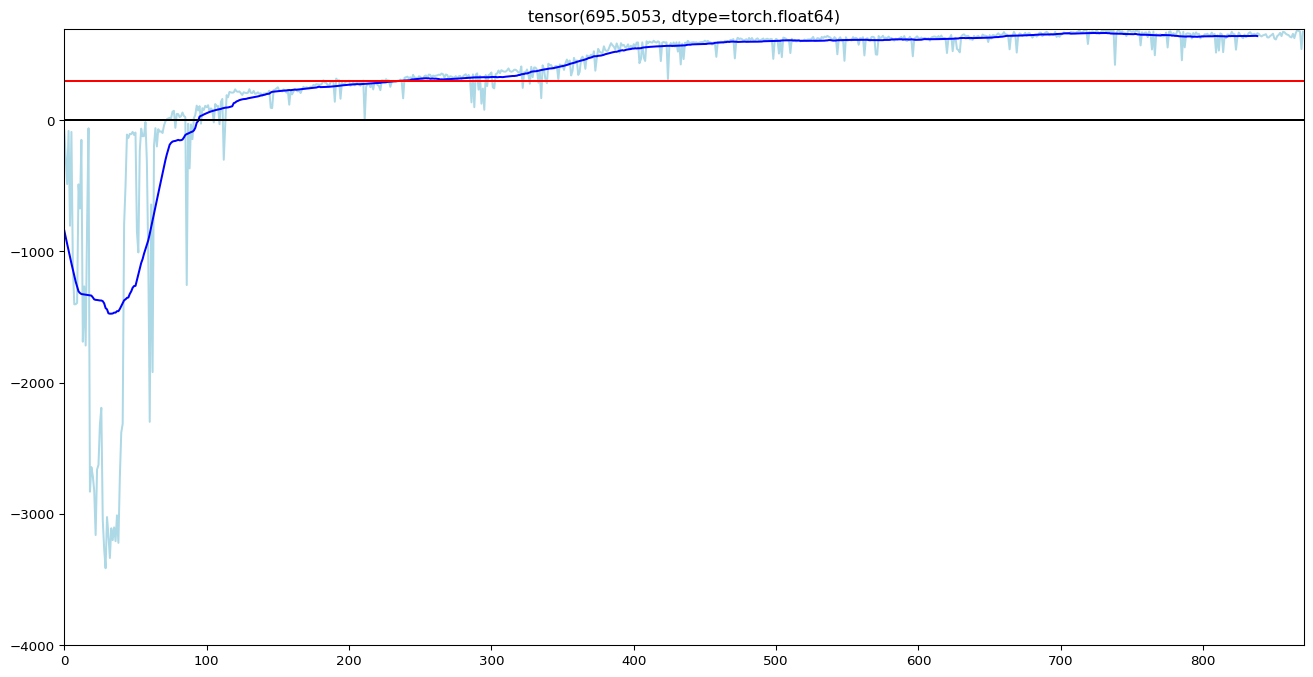

In [88]:
try:
    env.close()
except:
    pass
env = gym.make("BipedalWalker-v3", hardcore=False , render_mode="human")
observation, info = env.reset(seed=17)
steps_per_episode = 1600 # T
for episode in range(5000): # M

    action = [0]
    rewards = 0
    step = 0
    while(step < steps_per_episode):
        action = agent.choose_action(observation, env.action_space)  # this is where you would insert your policy
        
        observation, reward, terminated, truncated, info = env.step(action)

        rewards += reward
        
        temp_reward = reward * 100 if reward > 0 else reward
    
        #if temp_reward < 0 and temp_reward > -10:
        #    temp_reward = 0
        agent.update(observation, temp_reward, terminated, truncated)
        if terminated or truncated:
            observation, info = env.reset()
        step += 1
    scores.append(rewards)
    if (episode % 10 == 0):
        print(f"Episode: {episode}, Reward: {rewards}, Memory Size: {agent.memory.size}")
    plt.clf()
    plt.figure(figsize=(1600/96, 800/96), dpi=96)
    plt.title(max(scores))
    plt.ylim((-4000, max(scores)))
    plt.xlim((0, len(scores)))

    plt.plot(np.array(scores), color="lightblue") #  / steps_per_episode
    plt.plot(moving_average(np.array(scores), 64)[:-32], color="blue") #  / steps_per_episode
    plt.axhline(y=0, color="black", linestyle="-")
    plt.axhline(y=300, color="red", linestyle="-")
    plt.savefig("training-new.png")
    env.render()
    
    observation, info = env.reset()
    #control.reset()
env.close()


In [89]:
torch.save(agent.actor.state_dict(), "ac_td3.pth")
torch.save(agent.critic.state_dict(), "cr_td3.pth")

np.savetxt("scores_td3.csv", scores, delimiter=",")


In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(scores))], scores)
plt.show()